<a href="https://colab.research.google.com/github/sametkusdemir/SmartFarm_YieldPrediction/blob/main/notebooks/3_Final_Model_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb

# 1. Veriyi Yükle
file_path = '/content/drive/MyDrive/SmartFarm_Project/data/cleaned_data.csv'
df = pd.read_csv(file_path)

# 2. Encoding (Model Hazırlığı)
df_model = df.drop(['Area', 'Year'], axis=1) # Basitleştirme
df_encoded = pd.get_dummies(df_model, columns=['Item', 'Continent', 'Temp_Category'], drop_first=True)

# 3. Train-Test Split
X = df_encoded.drop('hg/ha_yield', axis=1)
y = df_encoded['hg/ha_yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Veri hazır!")

Veri hazır!


In [12]:
# XGBoost Regressor Modeli
# n_estimators: Ağaç sayısı, learning_rate: Öğrenme hızı
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    random_state=42,
    n_jobs=-1
)

print(" XGBoost eğitiliyor...")
xgb_model.fit(X_train, y_train)
print(" Eğitim tamamlandı.")

 XGBoost eğitiliyor...
 Eğitim tamamlandı.


------------------------------
XGBoost Model Performansı:
MAE: 8457.61
R2 Skoru: 0.9586
------------------------------


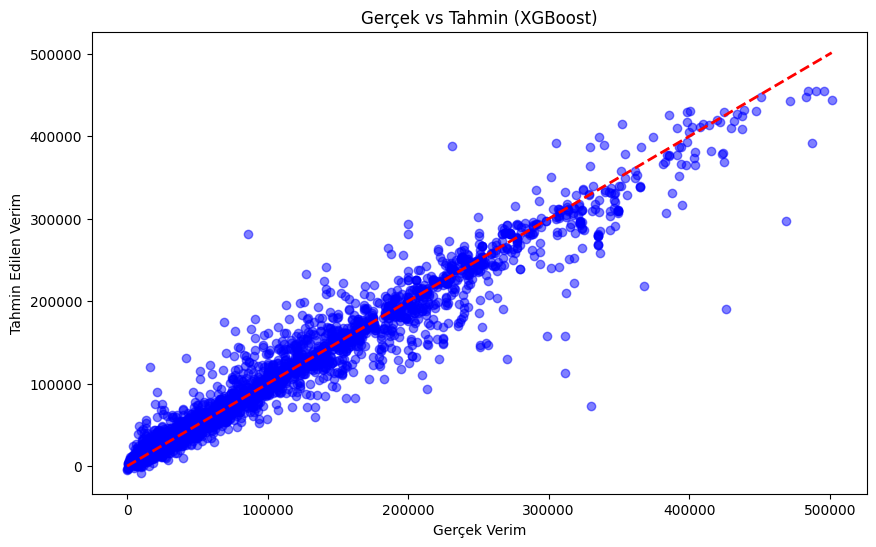

In [13]:
# Tahmin
y_pred = xgb_model.predict(X_test)

# Skorlar
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("-" * 30)
print(f"XGBoost Model Performansı:")
print(f"MAE: {mae:.2f}")
print(f"R2 Skoru: {r2:.4f}")
print("-" * 30)

# Gerçek vs Tahmin Grafiği
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # İdeal çizgi
plt.xlabel('Gerçek Verim')
plt.ylabel('Tahmin Edilen Verim')
plt.title('Gerçek vs Tahmin (XGBoost)')
plt.show()

/tmp/ipython-input-3730036120.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


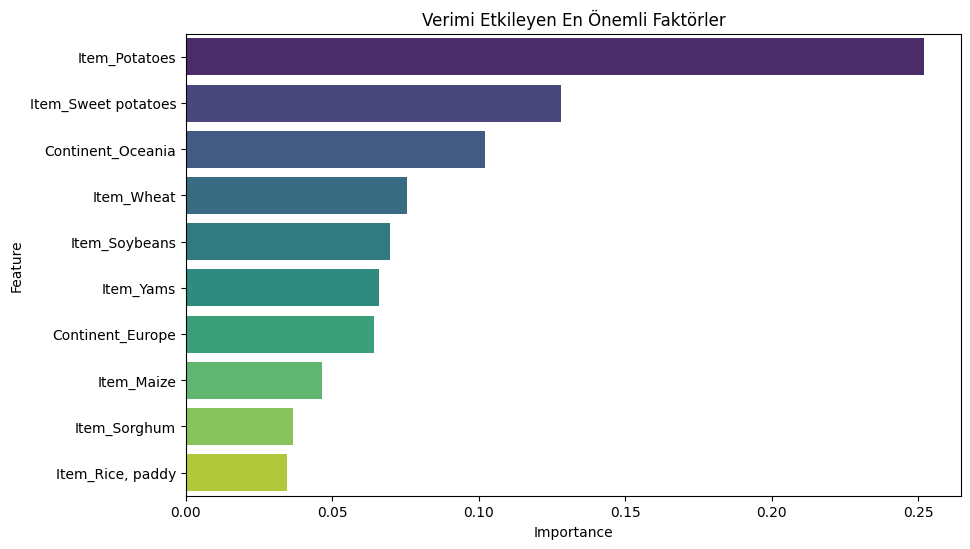

In [14]:
# Özellik Önem Düzeylerini Görselleştirme
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10) # İlk 10 özellik

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Verimi Etkileyen En Önemli Faktörler')
plt.show()

In [15]:
import joblib

# 1. Modeli Kaydet (.json formatı XGBoost için idealdir)
xgb_model.save_model('xgb_agriculture_model.json')

# 2. Modelin eğitildiği sütun isimlerini kaydet (App tarafında hata almamak için şart)
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

print(" Model ve sütun isimleri başarıyla kaydedildi!")

 Model ve sütun isimleri başarıyla kaydedildi!
